**Index.**

1. Machine Learning
    1. Supervised Learning
        1. EDA(Exploratory Data Analysis)
        1. K-Nearest Neighbors (KNN)
        1. Regression
        1. Cross Validation (CV)
        1. Hyperparameter Tuning
    2. Unsupervised Learning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
# Any results you write to the current directory are saved as output.

In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn', 'seaborn-bright', 'seaborn-poster', 'fast', 'grayscale', 'seaborn-pastel', 'seaborn-white', 'fivethirtyeight', 'dark_background', 'Solarize_Light2', 'seaborn-notebook', 'bmh', 'seaborn-deep', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-dark-palette', 'classic', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-ticks', '_classic_test', 'seaborn-paper', 'ggplot', 'tableau-colorblind10', 'seaborn-muted']


In [3]:
data.groupby('class').size() 

class
Abnormal    210
Normal      100
dtype: int64

# 8. MACHINE LEARNING (ML)
In python there are some ML libraries like sklearn, keras or tensorflow. 


## A. SUPERVISED LEARNING
* Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels *normal* and *abnormal*.
    * There are features(predictor variable) and target variable. Features are like *pelvic radius* or *sacral slope* Target variables are labels *normal* and *abnormal*
    * Aim is that as given features(input) predict whether target variable(output) is *normal* or *abnormal*
    * Classification: target variable consists of categories like normal or abnormal
    * Regression: target variable is continious like stock market

###  K-NEAREST NEIGHBORS (KNN)
* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points


In [4]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)

In [5]:
data.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


* Well, we fit the data and predict it with KNN. 
* Accuracy which is fraction of correct predictions is commonly used metric. We will use it know but there is another problem

<br>Therefore we need to split our data train and test sets.
* train: use train set by fitting
* test: make prediction on test set.
* With train and test sets, fitted data and tested data are completely different
* train_test_split(x,y,test_size = 0.3,random_state = 1)
    * x: features
    * y: target variables (normal,abnormal)
    * test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    * random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
* fit(x_train,y_train): fit on train sets
* score(x_test,y_test)): predict and give accuracy on test sets

In [6]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
# x,y = data.loc[:,data.columns != 'class '], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.860215053763


<br> Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity

<br> Model complexity:
* K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace. 
* Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
* If k is big, model that is less complex model can lead to underfit. 
* At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%. 



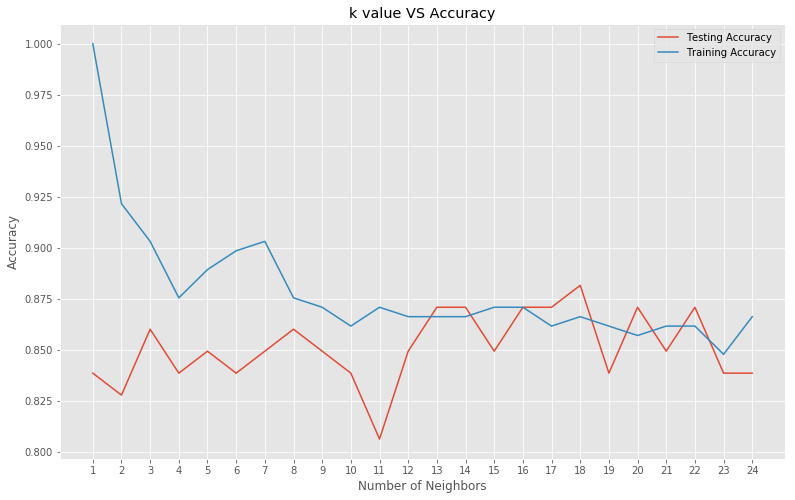

Best accuracy is 0.8817204301075269 with K = 18


In [7]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Typical Cross validaion curve..

![underfitting_overfitting](http://i.imgur.com/2q85n9s.png)

### REGRESSION
* Supervised learning
* We will learn linear and logistic regressions
* This orthopedic patients data is not proper for regression so I only use two features that are *sacral_slope* and *pelvic_incidence* of abnormal 
    * I  consider feature is pelvic_incidence and target is sacral_slope 
    * Lets look at scatter plot so as to understand it better
    * reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1). 

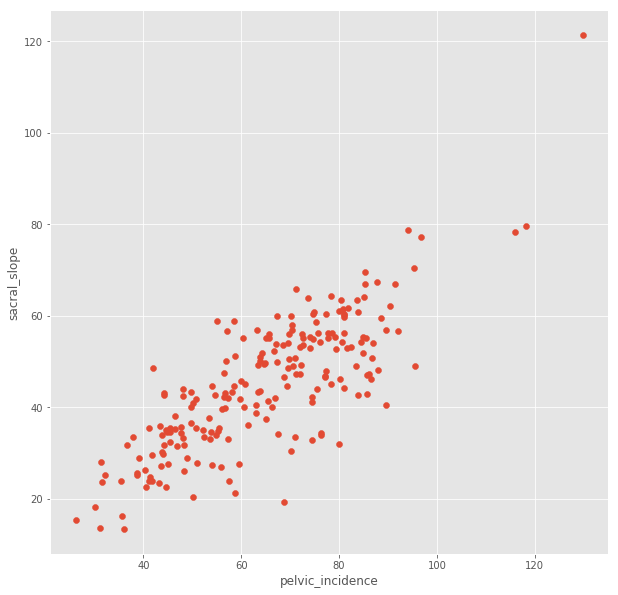

In [8]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Lets fit line into this points.

<br> Linear regression
* y = ax + b       where  y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.645841048108


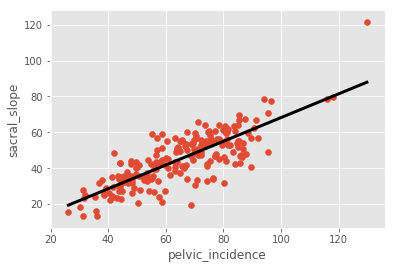

In [9]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### CROSS VALIDATION
As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
<br> Cross Validation (CV)
* K folds = K fold CV.
* Look at this image it defines better than me :)
* When K is increase, computationally cost is increase
* cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [10]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [ 0.32924233  0.61683991  0.53117056  0.1954798   0.29299864]
CV scores average:  0.393146250288


### Regularized Regression
As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

* Ridge regression: First regularization technique. Also it is called L2 regularization. 
    * Ridge regression loss fuction = OLS + alpha * sum(parameter^2)
    * alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
    * What if alpha is zero? loss function = OLS so that is linear rigression :)
    * If alpha is small that can cause overfitting
* Lasso regression: Second regularization technique. Also it is called L1 regularization. 
    * Lasso regression loss fuction = OLS + alpha * sum(absolute_value(parameter))
    * It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
    
<br> Linear vs Ridge vs Lasso
First impression: Linear
Feature Selection: 1.Lasso 2.Ridge
Regression model: 1.Ridge 2.Lasso 3.Linear 



In [6]:
data.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [11]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.560828791884
Ridge coefficients:  [[ 0.58743655]]


In [13]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)


ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))
print('Ridge coefficients: ',ridge.coef_)

Lasso score:  0.964033480433
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]
Ridge score:  0.951717853374
Ridge coefficients:  [[ 0.73788666 -0.72676327  0.09753121 -0.07094411]]


As you can see *pelvic_incidence* and *pelvic_tilt numeric* are important features but others are not important

<br> Now lets discuss accuracy. Is it enough for measurement of model selection. For example, there is a data that includes 95% normal and 5% abnormal samples and our model uses accuracy for measurement metric. Then our model predict 100% normal for all samples and accuracy is 95% but it classify all abnormal samples wrong. Therefore we need to use confusion matrix as a model measurement matris in imbalance data.
<br> While using confusion matrix lets use Random forest classifier to diversify classification methods.
* tp = true positive(20),fn = false negative(8), tn = true negative(58) , fp = false positive(7), 
* tp = Prediction is positive(normal) and actual is positive(normal). 
* fn = Prediction is negative(abnormal) and actual is positive(normal).
* fp = Prediction is positive(normal) and actual is negative(abnormal).
* tn = Prediction is negative(abnormal) and actual is negative(abnormal)
* precision = tp / (tp+fp)
* recall = tp / (tp+fn)


Accuracy = TP+TN/TP+FP+FN+TN

F1 Score = 2*(Recall ** Precision) / (Recall + Precision)




In [14]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[58  8]
 [ 7 20]]
Classification report: 
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93



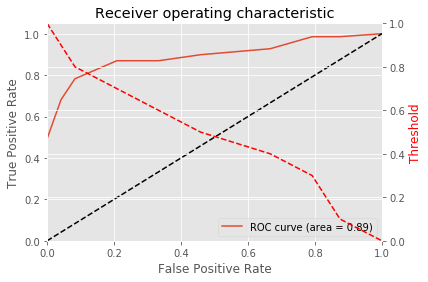

In [15]:
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
rf = RandomForestClassifier(random_state = 4,n_estimators=10)
rf.fit(x_train,y_train)
y_pred_prob =  rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.show()

plt.close()


In [21]:
thresholds

array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.1,  0. ])

In [34]:
data.groupby(['class']).size()

class
Abnormal    210
Normal      100
dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1,stratify =y)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[25  5]
 [ 9 54]]
Classification report: 
              precision    recall  f1-score   support

          0       0.74      0.83      0.78        30
          1       0.92      0.86      0.89        63

avg / total       0.86      0.85      0.85        93



__Metric selection. Imbalanced classes.__

Method 1: 100 retrieved , 90 relevant

Method 2: 2000 retrieved , 90 relevant

Method 1's result is preferable since they both come back with the same number of relevant results, but Method 2 brings a ton of false positives with it. The ROC measures of TPR and FPR will reflect that, but since the number of irrelevant documents dwarfs the number of relevant ones, the difference is mostly lost:

Method 1: 0.9 TPR, 0.00001 FPR

Method 2: 0.9 TPR, 0.00191 FPR (difference of 0.0019)

Precision and recall, however, don't consider true negatives and thus won't be affected by the relative imbalance (which is precisely why they're used for these types of problems):

Method 1: 0.9 recall, 0.9 precision

Method 2: 0.9 recall, 0.045 precision (difference of 0.855)

### HYPERPARAMETER TUNING
As I mention at KNN there are hyperparameters that are need to be tuned
* For example: 
    * k at KNN
    * alpha at Ridge and Lasso
    * Random forest parameters like max_depth
    * linear regression parameters(coefficients)
* Hyperparameter tuning: 
    * try all of combinations of different parameters
    * fit all of them
    * measure prediction performance
    * see how well each performs
    * finally choose best hyperparameters
* This process is most difficult part of this tutorial. Because we will write a lot of for loops to iterate all combinations. Just I am kidding sorry for this :) (We actually did it at KNN part)
* We only need is one line code that is GridSearchCV
    * grid: K is from 1 to 50(exclude)
    * GridSearchCV takes knn and grid and makes grid search. It means combination of all hyperparameters. Here it is k.


In [17]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Tuned hyperparameter k: {'n_neighbors': 3}
Best score: 0.7451612903225806


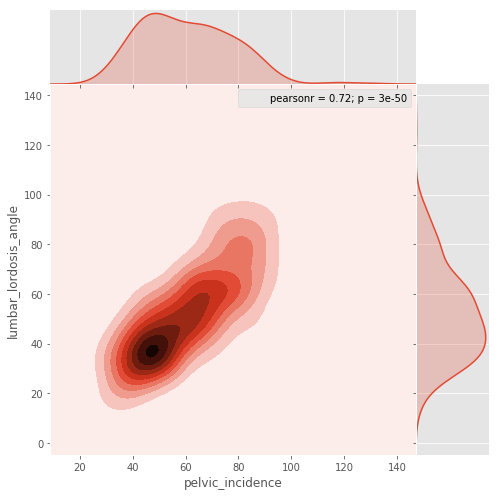

In [25]:
import seaborn as sns
%matplotlib inline

sns.jointplot('pelvic_incidence','lumbar_lordosis_angle',data.head(1000),  kind="kde", size=7, space=0)

<img src="gridsearch.png",width=500,height=500>